# Pip

In [1]:
# !pip freeze > requirements.txt

# Experiments

In [2]:
result = {}

## Node count = 10, wheel graphs, product count = 3

### Generate data

In [3]:
parameters_dict = {
    'num_nodes': 3,
    'num_graphs': 100,
    'products_count': 3,
    'num_depots': 1,
    'k_vehicles': 2,
    'compartment_capacity': 50,
    'planning_horizon': 7,
    'noise_demand': 0.2,
    'batch_size':100,
    'seed':6,
    'epochs':100,
    'max_trips':2,
    'eval_epochs':3
}

In [4]:
# parameters_dict = {
#     'num_nodes': 10,
#     'num_graphs': 100,
#     'products_count': 1,
#     'num_depots': 1,
#     'k_vehicles': 10,
#     'compartment_capacity': 50,
#     'planning_horizon': 7,
#     'noise_demand': 0.2,
#     'batch_size':20,
#     'seed':6,
#     'epochs':100,
#     'max_trips':2,
#     'eval_epochs':1
# }

In [5]:
from PSRP.problem_solvers.gnn.graph_generation_functions import create_wheel_noised


dataset_dir='/content/drive/MyDrive/GraphDataset/wheel_10/'
generation_function=create_wheel_noised
node_dim = parameters_dict["products_count"]*3 + 2

In [6]:
from PSRP.problem_solvers.gnn.dataset_utils import CustomImageDataset
from torch.utils.data import DataLoader

dataset = CustomImageDataset(dataset_dir=dataset_dir,
        generation_function=generation_function,
        parameters_dict=parameters_dict)

train_dataloader = DataLoader(dataset, batch_size=parameters_dict['batch_size'], shuffle=True)

c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:95: RuntimeWarning: invalid value encountered in divide
  min_capacities = min_capacities / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:96: RuntimeWarning: invalid value encountered in divide
  init_capacities = init_capacities / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:97: RuntimeWarning: divide by zero encountered in divide
  vehicle_compartments = vehicle_compartments / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:98: RuntimeWarning: invalid value encountered in divide
  node_demand = np.array(plan_horizon_prods) / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:100: RuntimeWarning: divide by zero encountered in divide
  load = load / max_capacities
c:\Users\rkozl\Desktop\Sber\PSRP\problem_solvers\gnn\dataset_utils.py:101: RuntimeWarning: invalid value en

In [7]:
from PSRP.problem_solvers.gnn.RL.agent import IRPAgent

agent_irp = IRPAgent(node_dim=node_dim, seed=parameters_dict['seed'])

In [8]:
import time
from PSRP.problem_solvers.gnn.RL.train import train

loss_history, dist_history, dry_runs_history, kpi = train(agent_irp,
            train_dataloader,
            parameters_dict,
            check_point_dir=f"./check_points/my_irp_{parameters_dict['num_nodes']}_{parameters_dict['seed']}/")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:10<?, ?it/s]


AssertionError: was expecting embedding dimension of 384, but got 128

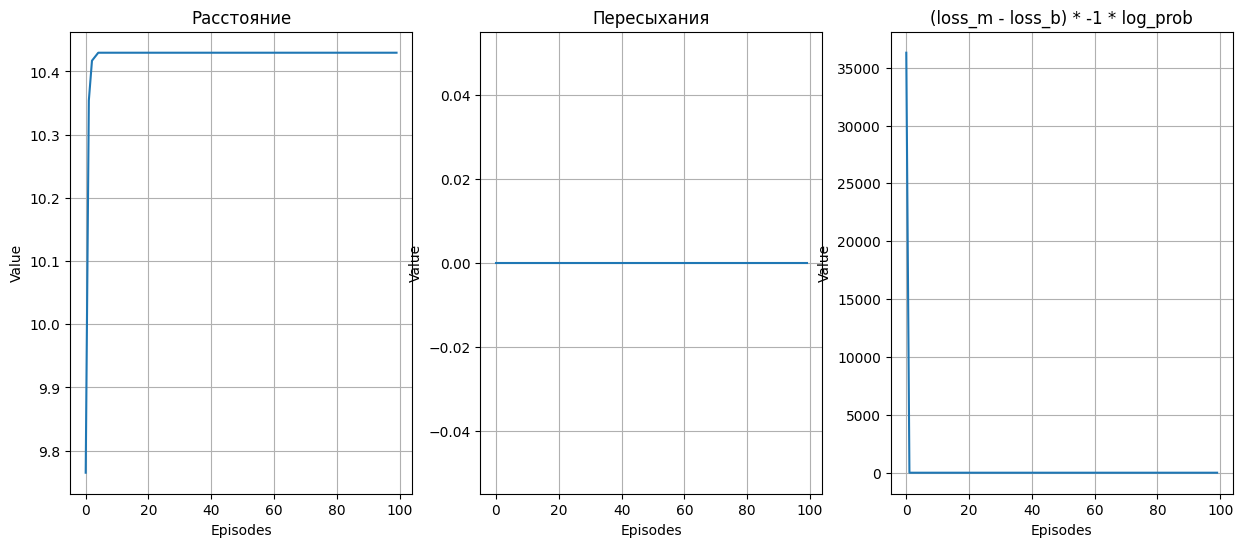

In [ ]:
import matplotlib.pyplot as plt

linspace = range(len(dist_history))

figure, axis = plt.subplots(1, 3, figsize=(15,6))

axis[0].plot(linspace, dist_history)
axis[0].set_title("Расстояние")
axis[0].grid()
axis[0].set_xlabel("Episodes")
axis[0].set_ylabel("Value")


axis[1].plot(linspace, dry_runs_history)
axis[1].set_title("Пересыхания")
axis[1].grid()
axis[1].set_xlabel("Episodes")
axis[1].set_ylabel("Value")

axis[2].plot(linspace, loss_history)
axis[2].set_title("(loss_m - loss_b) * -1 * log_prob")
axis[2].grid()
axis[2].set_xlabel("Episodes")
axis[2].set_ylabel("Value")

plt.show()

### Pred on CPSAT

In [ ]:
# num_nodes = 10
# synth_data = create_wheel_noised(num_nodes)
# data_nn, data_cpsat = get_graph_dict(synth_data,
#                                      num_nodes,
#                                      products_count,
#                                      compartment_capacity,
#                                      7,
#                                      k_vehicles=k_vehicles,
#                                      noise_demand=0.0,
#                                      draw=True)

data_nn = dataset[0]
data_cpsat = dataset.model_for_cpsat

In [ ]:
# from datetime import datetime
# import pprint
# import time

# from PSRP.problem_solvers.mppsrp.cpsat.TaskBuilder_MPPSRP_FullMILP_CPSAT import TaskBuilder_MPPSRP_FullMILP_CPSAT
# from PSRP.problem_solvers.mppsrp.cpsat.TaskSolver_MPPSRP_CPSAT import TaskSolver_MPPSRP_CPSAT
# # from PSRP.problem_solvers.mppsrp.data_generators.DataBuilder_MPPSRP_FullMILP_CPSAT import DataBuilder_MPPSRP_FullMILP_CPSAT

# from PSRP.paths_config import interim_dir

# task_builder = TaskBuilder_MPPSRP_FullMILP_CPSAT( max_trips_per_day=parameters_dict['max_trips'], verbose=True )
# task = task_builder.build_task( data_cpsat )

# print("Solving start time: {}".format( datetime.now() ))
# task_solver = TaskSolver_MPPSRP_CPSAT( cache_dir=interim_dir,
#                                        cache_all_feasible_solutions=False,
#                                        solution_prefix='dataset',
#                                        time_limit_milliseconds=60_000)
# start_time = time.time()
# solution = task_solver.solve( task )
# delta_time = time.time() - start_time
# print('kpi')
# kpi_dict = solution.get_kpis()
# pprint( kpi_dict )

# print()
# routes_schedule = solution.get_routes_schedule()
# pprint( routes_schedule )

# print("done")

### Pred on model

In [ ]:
import numpy as np


item = dataset[0]
new_item = []
for i in range(len(item)):
  new_item.append(np.expand_dims(item[i], axis=0))

In [ ]:
import time
from copy import deepcopy

from PSRP.problem_solvers.gnn.RL.envipoment import IRPEnv_Custom

temp_data = deepcopy(new_item)

env_irp = IRPEnv_Custom(temp_data,
                        parameters_dict)

In [ ]:

import torch


start_time = time.time()
loss_a, kpi = agent_irp.evaluate(env_irp)
# agent_irp.model.eval()

# with torch.no_grad():
#     loss_a, _, kpi = agent_irp.model(env_irp, rollout=True)
# agent_irp.model.train()

delta_time_model = time.time() - start_time
print(loss_a)

tensor([-10.4296], device='cuda:0')


In [ ]:
for e in zip(kpi['load_percents'], [e.item() for e in kpi['actions_list']]):
    print(e)

(array([[[0.49825332, 0.49709192, 0.510959  ]]], dtype=float32), 2)
(array([[[0.5307057 , 0.47719353, 0.50048745]]], dtype=float32), 0)
(array([[[0.49712086, 0.5061968 , 0.49611756]]], dtype=float32), 1)
(array([[[0.5329396 , 0.48678222, 0.5083672 ]]], dtype=float32), 0)
(array([[[0.49582088, 0.5060767 , 0.49453002]]], dtype=float32), 1)
(array([[[0.53243124, 0.48665643, 0.50780797]]], dtype=float32), 0)
(array([[[0.52670455, 0.5098509 , 0.49602178]]], dtype=float32), 2)
(array([[[0.52943087, 0.47597963, 0.49776715]]], dtype=float32), 0)
(array([[[0.49814656, 0.5063274 , 0.4978428 ]]], dtype=float32), 1)
(array([[[0.53341424, 0.4874171 , 0.50909233]]], dtype=float32), 0)
(array([[[0.5287285 , 0.5104164 , 0.49895504]]], dtype=float32), 2)
(array([[[0.53023   , 0.4770661 , 0.49970657]]], dtype=float32), 0)
(array([[[0.5314585 , 0.49167576, 0.5010604 ]]], dtype=float32), 0)
(array([[[0.5305041 , 0.49150637, 0.49958834]]], dtype=float32), 0)
(array([[[0.4981012 , 0.5063073 , 0.49784273]]],

In [ ]:
actions = [e.item() for e in kpi['actions_list']]
m = data_cpsat['distance_matrix']
t = data_cpsat['travel_time_matrix']

time_delta = 18*60*60 - 9*60*60

sum_dist = 0
sum_time = 0
global_sum_time = 0
exceeded_time = 0
actions.insert(0,0)
print(actions)
for i in range(len(actions)-1):
  start = actions[i]
  end = actions[i+1]
  dist = m[start][end]
  edge_time = t[start][end]
  sum_time += edge_time
  global_sum_time += edge_time
  sum_dist += dist

  if end == 0 and sum_time > time_delta:
    # print(start, end)
    exceeded_time += 1
    sum_time = 0
  print(f'{start} -> {end} : dist = {dist} time = {edge_time}')

print()
print(f'sum_dist={sum_dist}, sum_time={global_sum_time}, exceeded_time = {exceeded_time}')

[0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0]
0 -> 2 : dist = 170 time = 10200
2 -> 0 : dist = 170 time = 10200
0 -> 1 : dist = 182 time = 10920
1 -> 0 : dist = 182 time = 10920
0 -> 1 : dist = 182 time = 10920
1 -> 0 : dist = 182 time = 10920
0 -> 2 : dist = 170 time = 10200
2 -> 0 : dist = 170 time = 10200
0 -> 1 : dist = 182 time = 10920
1 -> 0 : dist = 182 time = 10920
0 -> 2 : dist = 170 time = 10200
2 -> 0 : dist = 170 time = 10200
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 1 : dist = 182 time = 10920
1 -> 0 : dist = 182 time = 10920
0 -> 2 : dist = 170 time = 10200
2 -> 0 : dist = 170 time = 10200
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 1 : dist = 182 time = 10920
1 -> 0 : dist = 182 time = 10920
0 -> 2 : dist = 170 time = 10200
2 -> 0 : dist = 170 time = 10200
0 -> 0 : dist = 0 time = 0
0 -> 0 : dist = 0 time = 0
0 -> 1 : dist = 182 time = 10920
1 -> 0 : 

In [ ]:
kpi['dry_runs']

defaultdict(int, {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0})

In [ ]:

from PSRP.problem_solvers.gnn.utils import divide_to_paths_nn


nn_paths = divide_to_paths_nn(actions)
lengths = []
for e in nn_paths:
  if not np.all(np.array(e) == 0):
    lengths.append(len(e))
np.array(lengths).mean()

kpi['mean_stops'] = np.array(lengths).mean()

actions_daily = kpi['actions_daily']
for key in actions_daily:
  actions_daily[key] =[e.item() for e in actions_daily[key]]

In [ ]:
import pandas as pd


result['wheel_10_3'] = {
        'sum_dist_cpsat':kpi_dict['total_travel_distance'],
        'sum_dist_model':sum_dist,
        'error': (kpi_dict['total_travel_distance'] - sum_dist) / kpi_dict['total_travel_distance'],
        'time_cpsat':delta_time,
        'time_model':delta_time_model,
        'dry_runs_model':sum(list(kpi['dry_runs'].values())),
        'dry_runs_cpsat':kpi_dict['dry_runs'],
    }
pd.DataFrame.from_dict(result, orient='index',).round(3)

NameError: name 'kpi_dict' is not defined

In [ ]:
from PSRP.problem_solvers.gnn.utils import draw_paths


In [ ]:
from matplotlib import pyplot as plt
import networkx as nx

import matplotlib.colors as mcolors

def draw_paths(data_nn, routes):
  G = nx.Graph()
  edges = []
  for r in routes:
      route_edges = [(r[n],r[n+1]) for n in range(len(r)-1)]
      G.add_nodes_from(r)
      G.add_edges_from(route_edges)
      edges.append(route_edges)

  print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),
  G.number_of_edges()))

  pos = data_nn[0]
  nx.draw_networkx_nodes(G,pos=pos)
  nx.draw_networkx_labels(G,pos=pos)
  colors = list(mcolors.TABLEAU_COLORS.keys())
  for ctr, edgelist in enumerate(edges):
      nx.draw_networkx_edges(G,pos=pos,edgelist=edgelist,edge_color = colors[ctr % len(colors)], width=5)
  plt.savefig('this.png')
  plt.show()
  
  
def divide_to_paths_nn(actions):

  particular_value = 0
  result = []
  temp_list = []
  for i in actions:
      if i == particular_value:
          temp_list.append(i)
          result.append(temp_list)
          temp_list.insert(0,0)
          temp_list = []
      else:
          temp_list.append(i)
  result.append(temp_list)
  result.pop(0)
  result.pop(-1)
  return result

def divide_to_path_cpsat(routes_schedule):
  result_paths = []
  for car in routes_schedule[0]:
    for e in car:
      result_paths.append(e[0])
  return result_paths

In [ ]:

nn_paths = divide_to_paths_nn(actions)
print(nn_paths)
draw_paths(data_nn, nn_paths)

In [ ]:

nn_paths = divide_to_paths_nn(actions_daily[1.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[3.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[4.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:


nn_paths = divide_to_paths_nn(actions_daily[5.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[6.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
actions_daily

In [ ]:
nn_paths = divide_to_paths_nn(actions_daily[7.0])
print(len(nn_paths))
draw_paths(data_nn, nn_paths)

In [ ]:
from PSRP.problem_solvers.gnn.utils import divide_to_path_cpsat


cpsat_path = divide_to_path_cpsat(routes_schedule)
draw_paths(data_nn, cpsat_path)